In [1]:
import numpy as np
from itertools import combinations

In [2]:
from collections import deque
from matplotlib import pyplot as plt
import Field
import Game
import Agent
import Cards
from utils import * 
from importlib import reload
from random import choice, shuffle

reload(Field)
reload(Game)
reload(Agent)
reload(Cards)

<module 'Cards' from '/home/clark/Apps/durakula/game/Cards.py'>

In [3]:
numplayers = 4
durak_game = Game.DurakGame(numplayers, 'small')

In [298]:
for p in durak_game.players:
    print(p.player_mode)

MODE_ATTACK
MODE_ATTACK
MODE_ATTACK
MODE_DEFEND


In [277]:
print(durak_game.playing_field)

--- Playing Field ---
Drawing DurakDeck: --- Card Collection ---
Cards: D5.
Size: 1
-----------------------

0:--- Card Collection ---
Cards: D2,D4,D7,C2,C8,H0,H1,H4,S8.
Size: 9
-----------------------

1:--- Card Collection ---
Cards: D3,C7,H2,H3,H8,S0.
Size: 6
-----------------------

2:--- Card Collection ---
Cards: C1,C3,C6,S1,S2,S3.
Size: 6
-----------------------

3:--- Card Collection ---
Cards: D0,D1,D6,C0,C4,S4.
Size: 6
-----------------------

Trump suit is Diamonds
---------------------



In [278]:
durak_game.playing_field.first_attack

True

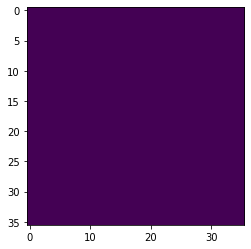

In [279]:
plt.imshow(durak_game.playing_field.field)

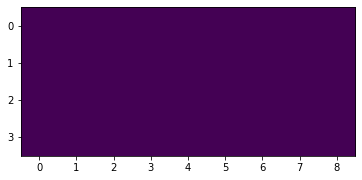

In [280]:
plt.imshow(durak_game.playing_field.attack_buffer)

In [281]:
players_on_attack = [p.player_id for p in durak_game.playing_field.attack_players()]
p_att_idx = players_on_attack[0]
print(durak_game.players[p_att_idx].get_deck_from_hand())

--- Card Collection ---
Cards: C1,C3,C6,S1,S2,S3.
Size: 6
-----------------------



In [282]:
p_def_idx = durak_game.playing_field.defend_player().player_id
print(durak_game.players[p_def_idx].get_deck_from_hand())

--- Card Collection ---
Cards: D0,D1,D6,C0,C4,S4.
Size: 6
-----------------------



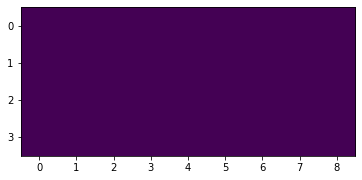

In [283]:
plt.imshow(durak_game.players[p_def_idx].buffer)

In [284]:
attack_moves = durak_game.playing_field.get_legal_moves(p_att_idx)
attack_moves

[((0, 1),),
 ((0, 2),),
 ((0, 3),),
 ((1, 1),),
 ((1, 3),),
 ((1, 6),),
 ((0, 1), (1, 1)),
 ((0, 3), (1, 3))]

In [285]:
random_move = choice(durak_game.playing_field.get_legal_moves(p_att_idx))
print(random_move)

((0, 3), (1, 3))


In [286]:
durak_game.get_next_state(random_move, p_att_idx)

(<Field.DurakField at 0x7f89a41f7d90>, 3)

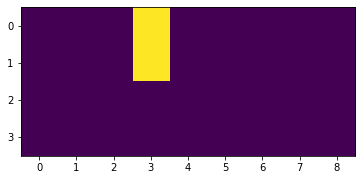

In [287]:
plt.imshow(durak_game.playing_field.attacks)

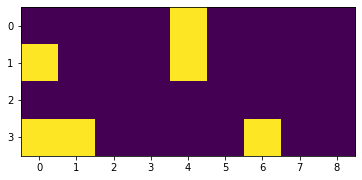

In [288]:
plt.imshow(durak_game.players[p_def_idx].hand)

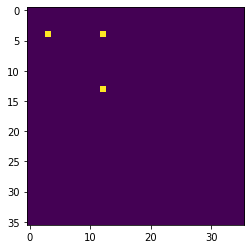

In [289]:
player = durak_game.players[p_def_idx]
attack_idxs = np.flatnonzero(durak_game.playing_field.attacks)
n_vals = durak_game.playing_field.n_vals
n_suits = durak_game.playing_field.n_suits
nontrump_attack_idxs = attack_idxs[attack_idxs >= n_vals]
valid_defenses = np.zeros_like(durak_game.playing_field.field)
f = lambda x : (x // n_vals + 1)*n_vals

for att_idx in attack_idxs:
    valid_defenses[att_idx + 1 : f(att_idx), att_idx] = 1
for att_idx in nontrump_attack_idxs:
    valid_defenses[:n_vals, att_idx] = 1
    
if durak_game.playing_field.first_attack:
    valid_defenses[att_idx % n_vals : att_idx % n_vals + n_suits*n_vals : n_vals, att_idx] = 1

valid_defenses *= player.hand.ravel()[:,np.newaxis]
plt.imshow(valid_defenses)

In [290]:
defend_actions = durak_game.playing_field.get_legal_moves(p_def_idx)
print(defend_actions)

['ACTION_GIVEUP', ((4, 3), (13, 12))]


In [291]:
random_defend = choice(defend_actions)
print(random_defend)
# random_defend = 'ACTION_GIVEUP'

((4, 3), (13, 12))


In [292]:
durak_game.players[p_def_idx].buffer

array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0]])

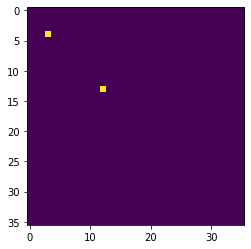

In [293]:
durak_game.get_next_state(random_defend, p_def_idx)
plt.imshow(durak_game.playing_field.field)

In [294]:
for p in durak_game.players:
    print(p.player_mode)

MODE_ATTACK
MODE_ATTACK
MODE_ATTACK
MODE_DEFEND


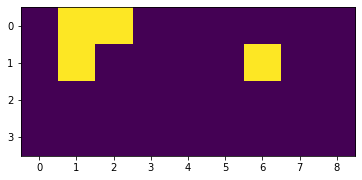

In [295]:
plt.imshow(durak_game.players[p_att_idx].hand)

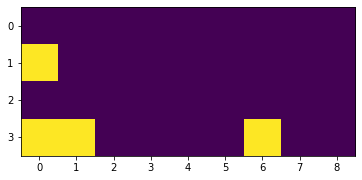

In [296]:
plt.imshow(durak_game.players[p_def_idx].hand)

In [297]:
durak_game.playing_field.field_active

True